First we install and import dependencies.

In [1]:
%%capture
# To install dependencies, uncomment the line below:
# !pip install pandas matplotlib numpy seaborn requests plotnine

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In this research we'll use RAWG dataset. We downloaded the dataset of rawg from this [url](https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset). The RAWG database also, provides a useful API which we use in this research. To access RAWG API, we need an API key which can be obtained through this [page](https://rawg.io/apidocs).

Let's import the dataset

In [3]:
# Load dataset from csv
df_rawg = pd.read_csv('rawg.csv')

# We need (id, name, released, genres, platforms) columns of df_rawg.
df_rawg = df_rawg[['id', 'name', 'released', 'genres', 'platforms']]

# Convert released column to datetime
df_rawg['released'] = pd.to_datetime(df_rawg['released'])

# replace || with , in genres and platforms columns
df_rawg['genres'] = df_rawg['genres'].str.replace('||', ', ')
df_rawg['platforms'] = df_rawg['platforms'].str.replace('||', ', ')

# Drop games with no genre or platform
df_rawg = df_rawg.dropna(subset=['genres', 'platforms'])

df_rawg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368347 entries, 0 to 474416
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         368347 non-null  int64         
 1   name       368344 non-null  object        
 2   released   347318 non-null  datetime64[ns]
 3   genres     368347 non-null  object        
 4   platforms  368347 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 16.9+ MB


In [4]:
# Extract list of genres
genres = df_rawg['genres'].str.split(', ').explode().unique()
genres

array(['Adventure', 'Puzzle', 'Simulation', 'Indie', 'Arcade', 'Action',
       'RPG', 'Strategy', 'Massively Multiplayer', 'Shooter',
       'Platformer', 'Educational', 'Casual', 'Racing', 'Sports',
       'Fighting', 'Family', 'Board Games', 'Card'], dtype=object)

In [5]:
# Extract list of platforms
platforms = df_rawg['platforms'].str.split(', ').explode().unique()
platforms

array(['PC', 'macOS', 'Xbox One', 'PlayStation 4', 'Nintendo Switch',
       'iOS', 'Linux', 'Web', 'Android', 'Nintendo 3DS', 'Xbox 360',
       'PlayStation 3', 'PS Vita', 'PlayStation 2', 'Xbox', 'Wii',
       'Game Boy Advance', 'Classic Macintosh', 'Wii U', 'Nintendo 64',
       'Game Boy', 'SNES', 'PlayStation', 'PSP', 'Nintendo DS',
       'Commodore / Amiga', 'GameCube', 'PlayStation 5', 'Dreamcast',
       'SEGA Master System', '3DO', 'Atari ST', 'NES', 'Genesis',
       'Game Gear', 'Neo Geo', 'SEGA CD', 'Game Boy Color',
       'Nintendo DSi', 'SEGA Saturn', 'Apple II', 'Jaguar', 'Atari 8-bit',
       'Xbox Series S/X', 'Atari 2600', 'Atari 5200', 'SEGA 32X',
       'Atari Lynx', 'Atari 7800', 'Atari XEGS', 'Atari Flashback'],
      dtype=object)

### What are the most popular game genres in each decade, and how has this changed over time?

In [6]:
# Create a new dataframe with columns: decades
# rows: genres
# values: count of games in that genre released in that decade
df_decades_genres = pd.DataFrame(index=genres, columns=['1980s', '1990s', '2000s', '2010s', '2020s'])

# Fill the dataframe with count of games in that genre released in that decade
for genre in genres:
    for decade in df_decades_genres.columns:
        df_decades_genres.loc[genre, decade] = df_rawg[(df_rawg['genres'].str.contains(genre)) & (df_rawg['released'].dt.year // 10 * 10 == int(decade[:4]))].shape[0]
        
df_decades_genres


,1980s,1990s,2000s,2010s,2020s
Adventure,258,828,1486,47321,17775
Puzzle,103,392,884,37919,14413
Simulation,93,475,920,29318,7239
Indie,12,50,286,22659,4062
Arcade,181,1168,2919,16369,62
Action,369,1137,2856,67948,22747
RPG,142,527,1150,21486,5757
Strategy,111,753,2018,21721,5865
Massively Multiplayer,1,16,303,1204,181
Shooter,55,332,887,20107,9590


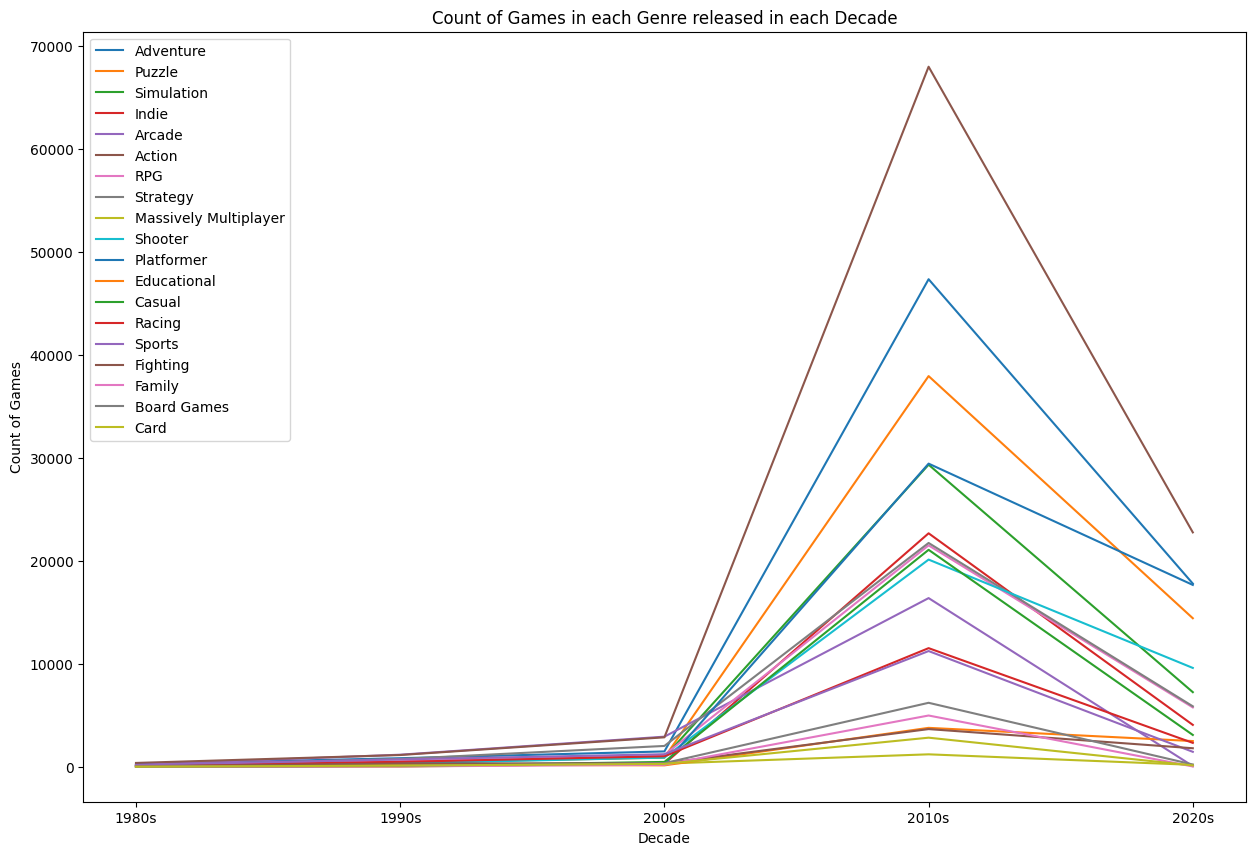

In [7]:
# Plot count of games in each genre released in each decade
plt.figure(figsize=(15, 10))
for genre in genres:
    plt.plot(df_decades_genres.columns, df_decades_genres.loc[genre], label=genre)
plt.xlabel('Decade')
plt.ylabel('Count of Games')
plt.title('Count of Games in each Genre released in each Decade')
plt.legend(loc='upper left')
plt.show()

In [8]:
# Calculate the percentage of games in each genre per decade
df_decades_genres_percentage = df_decades_genres.div(df_decades_genres.sum(axis=0), axis=1) * 100
df_decades_genres_percentage

,1980s,1990s,2000s,2010s,2020s
Adventure,14.827586,10.369443,8.28871,12.430128,15.213893
Puzzle,5.91954,4.909205,4.930834,9.960441,12.336306
Simulation,5.344828,5.948654,5.131638,7.701158,6.19597
Indie,0.689655,0.626174,1.59527,5.951993,3.476728
Arcade,10.402299,14.627426,16.281794,4.299756,0.053067
Action,21.206897,14.239198,15.930388,17.848362,19.469504
RPG,8.16092,6.599875,6.414547,5.643873,4.927504
Strategy,6.37931,9.430182,11.256136,5.705602,5.019943
Massively Multiplayer,0.057471,0.200376,1.690094,0.316263,0.154921
Shooter,3.16092,4.157796,4.947568,5.281642,8.208227


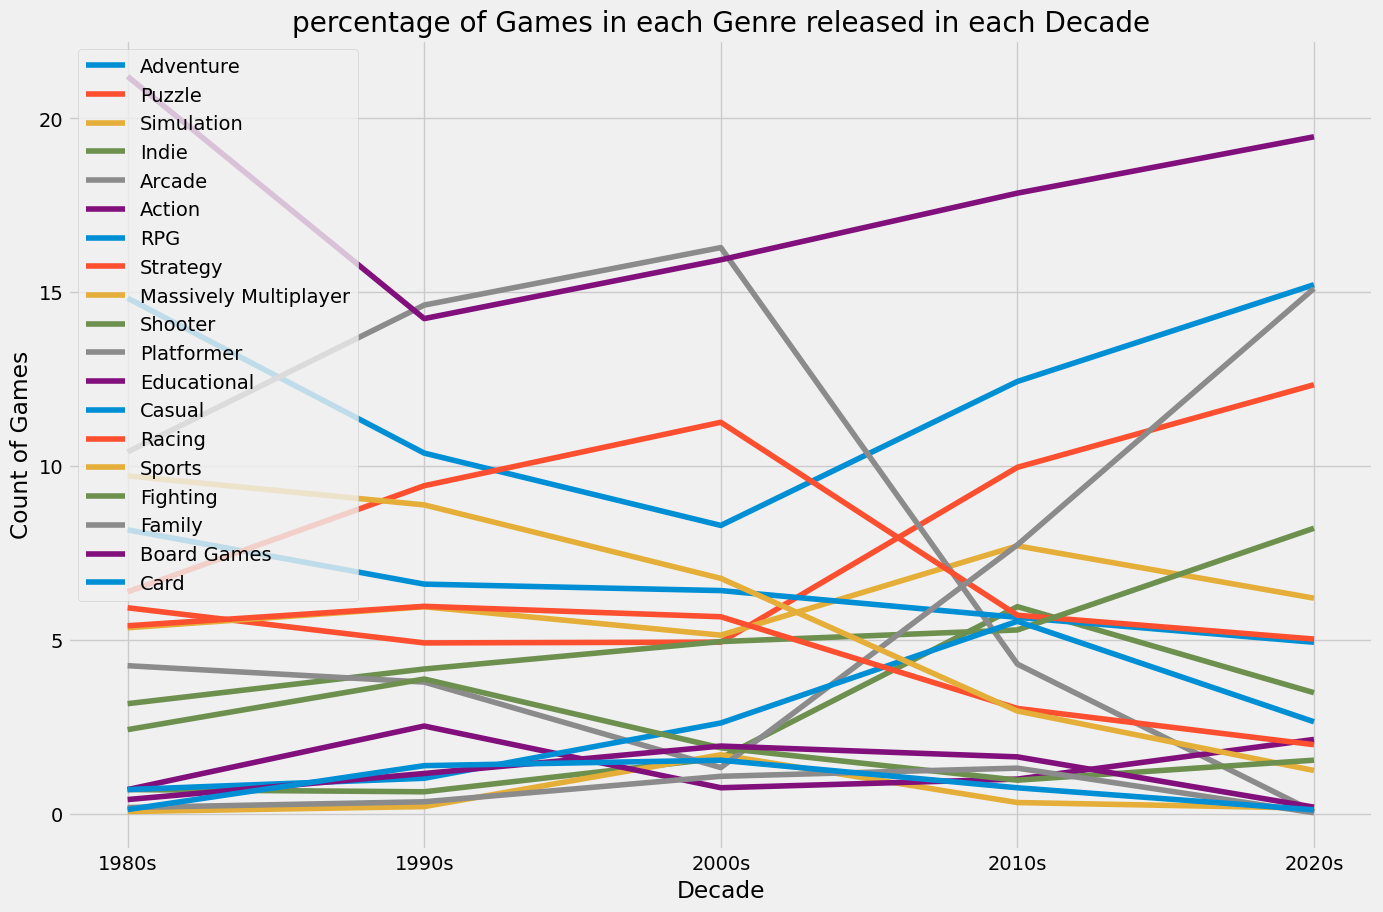

In [24]:
# Plot percentage of games in each genre released in each decade
# change style to make the plot more readable
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
for genre in genres:
    plt.plot(df_decades_genres_percentage.columns, df_decades_genres_percentage.loc[genre], label=genre)
plt.xlabel('Decade')
plt.ylabel('Count of Games')
plt.title('percentage of Games in each Genre released in each Decade')
plt.legend(loc='upper left')
plt.show()

In [25]:
# Change style to default
plt.style.use("default")

Taking a look at how video game genres have changed over the decades, here's what we see:

**Back in the '80s**: It was all about Adventure, Puzzle, and Simulation games. Think point-and-click mysteries, brain-teasing challenges, and building virtual worlds.

**The '90s rolled in**:  Gamers got hooked on Action, RPGs (those epic role-playing adventures), and Strategy games.  Suddenly, it was about fast-paced battles, leveling up characters, and conquering digital landscapes.

**The 2000s hit**:  Shooter games exploded onto the scene, alongside the rise of massive online worlds with Massively Multiplayer games.  Everyone wanted to test their aim and team up with friends online.

**By the 2010s**:  A new wave of creativity arrived with the surge of Indie games.  These smaller, independent titles offered unique experiences that broke the mold.  And don't forget the comeback of Arcade games, bringing back that classic, nostalgic feel.

**Now in the 2020s**:  It looks like Indie games are here to stay, becoming even more popular and possibly dominating the scene.  Gamers are hungry for those fresh, innovative ideas.

So, it's clear that gaming tastes have evolved a lot.  What started as a love for puzzle-solving and exploration has grown into a passion for action, strategy, online worlds, and the unique charm of indie titles.

### Are there any genres that are exclusive to specific platforms?

In this step, we are going to find out if there is any meaningful relation between platforms and genres

In [11]:
# Create a table of Top genres in each platform
df_platforms_genres = pd.DataFrame(index=platforms, columns=['Top Genre', 'Count'])
for platform in platforms:
    df_platforms_genres.loc[platform, 'Top Genre'] = df_rawg[df_rawg['platforms'].str.contains(platform)]['genres'].str.split(', ').explode().mode()[0]
    df_platforms_genres.loc[platform, 'Count'] = df_rawg[df_rawg['platforms'].str.contains(platform)].shape[0]
df_platforms_genres

,Top Genre,Count
PC,Action,220226
macOS,Action,48284
Xbox One,Action,3573
PlayStation 4,Action,4756
Nintendo Switch,Action,3308
iOS,Action,64801
Linux,Action,33601
Web,Action,74725
Android,Action,27681
Nintendo 3DS,Action,815


As we see in previous table, top genre in most of platforms is "Action". So let's find top 3 genres in each platform

In [12]:
# Create a table of Top 5 genres in each platform
df_platforms_genres_top5 = pd.DataFrame(index=platforms, columns=['Top 5 Genres'])
for platform in platforms:
    df_platforms_genres_top5.loc[platform, 'Top 5 Genres'] = ', '.join(df_rawg[df_rawg['platforms'].str.contains(platform)]['genres'].str.split(', ').explode().value_counts().head().index)
df_platforms_genres_top5

,Top 5 Genres
PC,"Action, Adventure, Platformer, Indie, Puzzle"
macOS,"Action, Adventure, Indie, Puzzle, Platformer"
Xbox One,"Action, Indie, Adventure, RPG, Casual"
PlayStation 4,"Action, Indie, Adventure, RPG, Casual"
Nintendo Switch,"Action, Indie, Adventure, Casual, RPG"
iOS,"Action, Arcade, Puzzle, Simulation, Adventure"
Linux,"Action, Adventure, Indie, Platformer, Puzzle"
Web,"Action, Platformer, Puzzle, Adventure, Shooter"
Android,"Action, Puzzle, Adventure, Casual, Arcade"
Nintendo 3DS,"Action, Adventure, Arcade, RPG, Puzzle"


This table shows top 5 genres in each platform. Now let's dig more. let's create a table for top selling platforms.
To categorize paltforms we can first categorize them by Operating System (OS) then by Company

In [13]:
# Put each platform of each company together
df_platforms_genres_top5['Company'] = np.nan
df_platforms_genres_top5.loc['PC', 'Company'] = 'PC'
df_platforms_genres_top5.loc['Xbox', 'Company'] = 'Microsoft'
df_platforms_genres_top5.loc['Xbox 360', 'Company'] = 'Microsoft'
df_platforms_genres_top5.loc['Xbox One', 'Company'] = 'Microsoft'
df_platforms_genres_top5.loc['Xbox Series S/X', 'Company'] = 'Microsoft'
df_platforms_genres_top5.loc['PlayStation', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['PlayStation 2', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['PlayStation 3', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['PlayStation 4', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['PlayStation 5', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['Nintendo Switch', 'Company'] = 'Nintendo'
df_platforms_genres_top5.loc['Nintendo DS', 'Company'] = 'Nintendo'
df_platforms_genres_top5.loc['Nintendo 3DS', 'Company'] = 'Nintendo'
df_platforms_genres_top5.loc['Nintendo Wii', 'Company'] = 'Nintendo'
df_platforms_genres_top5.loc['Nintendo Wii U', 'Company'] = 'Nintendo'
df_platforms_genres_top5.loc['iOS', 'Company'] = 'Apple'
df_platforms_genres_top5.loc['Android', 'Company'] = 'Google [android]'
df_platforms_genres_top5.loc['macOS', 'Company'] = 'Apple'
df_platforms_genres_top5.loc['Linux', 'Company'] = 'PC'
df_platforms_genres_top5.loc['Web', 'Company'] = 'Web'
df_platforms_genres_top5.loc['PlayStation Portable', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['PlayStation Vita', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['Xbox Live Arcade', 'Company'] = 'Microsoft'
df_platforms_genres_top5.loc['PlayStation Network', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['Nintendo eShop', 'Company'] = 'Nintendo'
df_platforms_genres_top5.loc['PlayStation Mobile', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['PlayStation Now', 'Company'] = 'Sony'
df_platforms_genres_top5.loc['PlayStation VR', 'Company'] = 'Sony'

# Create a table of Top 5 genres in each companies' platforms
df_companies_genres_top5 = pd.DataFrame(index=['PC', 'Microsoft', 'Sony', 'Nintendo', 'Apple', 'Google [android]', 'Web'], columns=['Top 5 Genres'])
for company in df_companies_genres_top5.index:
    df_companies_genres_top5.loc[company, 'Top 5 Genres'] = ', '.join(df_platforms_genres_top5[df_platforms_genres_top5['Company'] == company]['Top 5 Genres'].explode().value_counts().head().index)
df_companies_genres_top5

C:\Users\javad\AppData\Local\Temp\ipykernel_17692\2812184125.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'PC' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_platforms_genres_top5.loc['PC', 'Company'] = 'PC'


,Top 5 Genres
PC,"Action, Adventure, Platformer, Indie, Puzzle, ..."
Microsoft,"Action, Indie, Adventure, RPG, Casual, Action,..."
Sony,"Action, Indie, Adventure, RPG, Casual, Action,..."
Nintendo,"Action, Indie, Adventure, Casual, RPG, Action,..."
Apple,"Action, Adventure, Indie, Puzzle, Platformer, ..."
Google [android],"Action, Puzzle, Adventure, Casual, Arcade"
Web,"Action, Platformer, Puzzle, Adventure, Shooter"


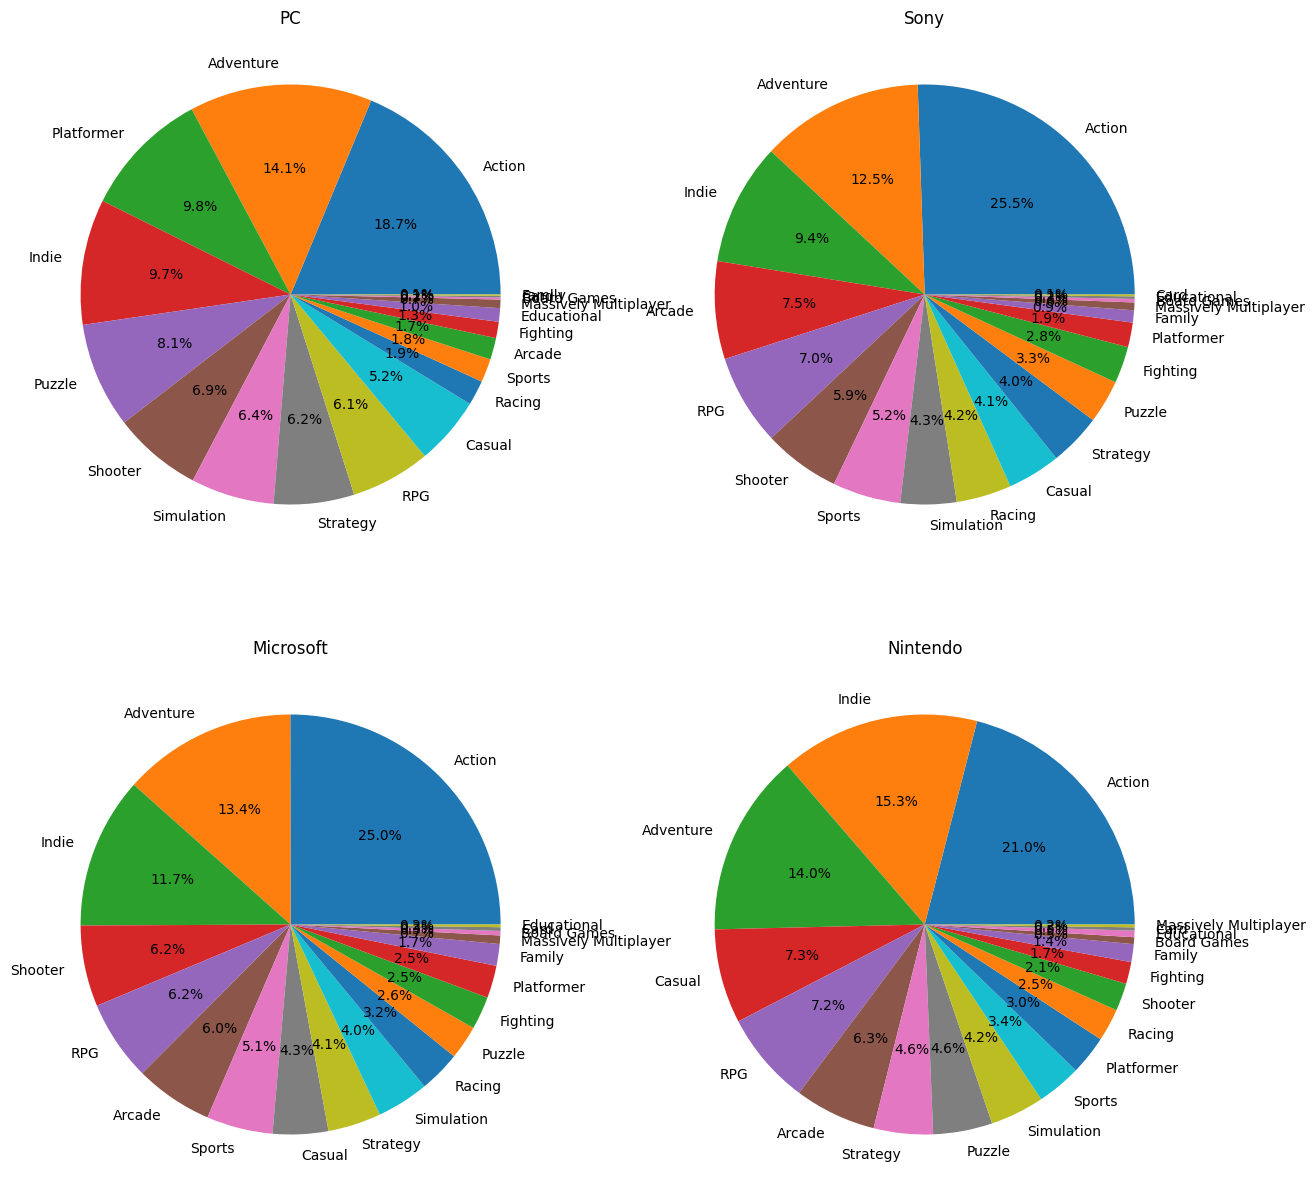

In [14]:
# Generate a table for each company with the count of games in each genre
df_pc_games = df_rawg[df_rawg['platforms'].str.contains('PC')]['genres'].str.split(', ').explode().value_counts()
df_sony_games = df_rawg[df_rawg['platforms'].str.contains('PlayStation')]['genres'].str.split(', ').explode().value_counts()
df_microsoft_games = df_rawg[df_rawg['platforms'].str.contains('Xbox')]['genres'].str.split(', ').explode().value_counts()
df_nintentdo_games = df_rawg[df_rawg['platforms'].str.contains('Nintendo')]['genres'].str.split(', ').explode().value_counts()

# Plot the percentage of games in each genre for each company
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].pie(df_pc_games, labels=df_pc_games.index, autopct='%1.1f%%')
axs[0, 0].set_title('PC')
axs[0, 1].pie(df_sony_games, labels=df_sony_games.index, autopct='%1.1f%%')
axs[0, 1].set_title('Sony')
axs[1, 0].pie(df_microsoft_games, labels=df_microsoft_games.index, autopct='%1.1f%%')
axs[1, 0].set_title('Microsoft')
axs[1, 1].pie(df_nintentdo_games, labels=df_nintentdo_games.index, autopct='%1.1f%%')
axs[1, 1].set_title('Nintendo')
plt.show()

We analyzed companies prefrences to develope games, But what does users prefer? With RAWG dataset we can't analyze it. So let's pick another dataset.
Here we used [Vide Games Sales](https://www.kaggle.com/datasets/gregorut/videogamesales) dataset. This dataset is a bit old but give us a good insight of gamers prefrences.
 It’s necessarily incomplete since it was scraped from an existing website; this is especially true for the early days of gaming (e.g, it has only 98 Nintendo Entertainment System (NES) games out of the library of ~716). It also misses a lot of the download-only market for PC and has no mobile games.
 

In [15]:
# Load dataset from csv
vgsales = pd.read_csv('vgsales.csv')

# Drop rows with missing values in Year column
vgsales = vgsales.dropna(subset=['Year'])

# Convert Year column to datetime
vgsales['Year'] = pd.to_datetime(vgsales['Year'], format='%Y')

vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16327 non-null  int64         
 1   Name          16327 non-null  object        
 2   Platform      16327 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16327 non-null  object        
 5   Publisher     16291 non-null  object        
 6   NA_Sales      16327 non-null  float64       
 7   EU_Sales      16327 non-null  float64       
 8   JP_Sales      16327 non-null  float64       
 9   Other_Sales   16327 non-null  float64       
 10  Global_Sales  16327 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [16]:
# Extract list of platforms and genres
platforms_vgsales = vgsales['Platform'].unique()
genres_vgsales = vgsales['Genre'].unique()

# Create a table of Top genres in each platform based on global sales
df_platforms_genres_vgsales = pd.DataFrame(index=platforms_vgsales, columns=['Top Genre', 'Global Sales'])
for platform in platforms_vgsales:
    df_platforms_genres_vgsales.loc[platform, 'Top Genre'] = vgsales[vgsales['Platform'] == platform]['Genre'].mode()[0]
    df_platforms_genres_vgsales.loc[platform, 'Global Sales'] = vgsales[vgsales['Platform'] == platform]['Global_Sales'].sum()
df_platforms_genres_vgsales

,Top Genre,Global Sales
Wii,Misc,909.81
NES,Platform,251.07
GB,Role-Playing,254.42
DS,Misc,818.96
X360,Action,969.61
PS3,Action,949.35
PS2,Sports,1233.46
SNES,Role-Playing,200.05
GBA,Action,313.56
3DS,Action,246.28


In [17]:
# Put each platform of each company together find top genre for each company
df_platforms_genres_vgsales['Company'] = np.nan
df_platforms_genres_vgsales.loc['Wii', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['NES', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['GB', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['DS', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['X360', 'Company'] = 'Microsoft'
df_platforms_genres_vgsales.loc['PS3', 'Company'] = 'Sony'
df_platforms_genres_vgsales.loc['PS2', 'Company'] = 'Sony'
df_platforms_genres_vgsales.loc['SNES', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['GBA', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['3DS', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['PS4', 'Company'] = 'Sony'
df_platforms_genres_vgsales.loc['N64', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['PS', 'Company'] = 'Sony'
df_platforms_genres_vgsales.loc['XB', 'Company'] = 'Microsoft'
df_platforms_genres_vgsales.loc['PC', 'Company'] = 'PC'
df_platforms_genres_vgsales.loc['2600', 'Company'] = 'Atari'
df_platforms_genres_vgsales.loc['PSP', 'Company'] = 'Sony'
df_platforms_genres_vgsales.loc['XOne', 'Company'] = 'Microsoft'
df_platforms_genres_vgsales.loc['GC', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['WiiU', 'Company'] = 'Nintendo'
df_platforms_genres_vgsales.loc['GEN', 'Company'] = 'Sega'
df_platforms_genres_vgsales.loc['DC', 'Company'] = 'Sega'
df_platforms_genres_vgsales.loc['PSV', 'Company'] = 'Sony'
df_platforms_genres_vgsales.loc['SAT', 'Company'] = 'Sega'
df_platforms_genres_vgsales.loc['SCD', 'Company'] = 'Sega'
df_platforms_genres_vgsales.loc['WS', 'Company'] = 'Bandai'
df_platforms_genres_vgsales.loc['NG', 'Company'] = 'SNK'
df_platforms_genres_vgsales.loc['TG16', 'Company'] = 'NEC'
df_platforms_genres_vgsales.loc['3DO', 'Company'] = '3DO'
df_platforms_genres_vgsales.loc['GG', 'Company'] = 'Sega'

# find top genre for each company with number of sales
df_companies_genres_vgsales = pd.DataFrame(index=['Nintendo', 'Microsoft', 'Sony', 'PC', 'Atari', 'Sega', 'Bandai', 'SNK', 'NEC', '3DO'], columns=['Top Genre', 'Global Sales'])
for company in df_companies_genres_vgsales.index:
    df_companies_genres_vgsales.loc[company, 'Top Genre'] = df_platforms_genres_vgsales[df_platforms_genres_vgsales['Company'] == company]['Top Genre'].mode()[0]
    df_companies_genres_vgsales.loc[company, 'Global Sales'] = df_platforms_genres_vgsales[df_platforms_genres_vgsales['Company'] == company]['Global Sales'].sum()
df_companies_genres_vgsales

C:\Users\javad\AppData\Local\Temp\ipykernel_17692\1896724875.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Nintendo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_platforms_genres_vgsales.loc['Wii', 'Company'] = 'Nintendo'


,Top Genre,Global Sales
Nintendo,Action,3491.36
Microsoft,Action,1362.76
Sony,Action,3541.64
PC,Strategy,255.05
Atari,Action,86.57
Sega,Fighting,79.83
Bandai,Role-Playing,1.42
SNK,Fighting,1.44
NEC,Adventure,0.16
3DO,Adventure,0.1


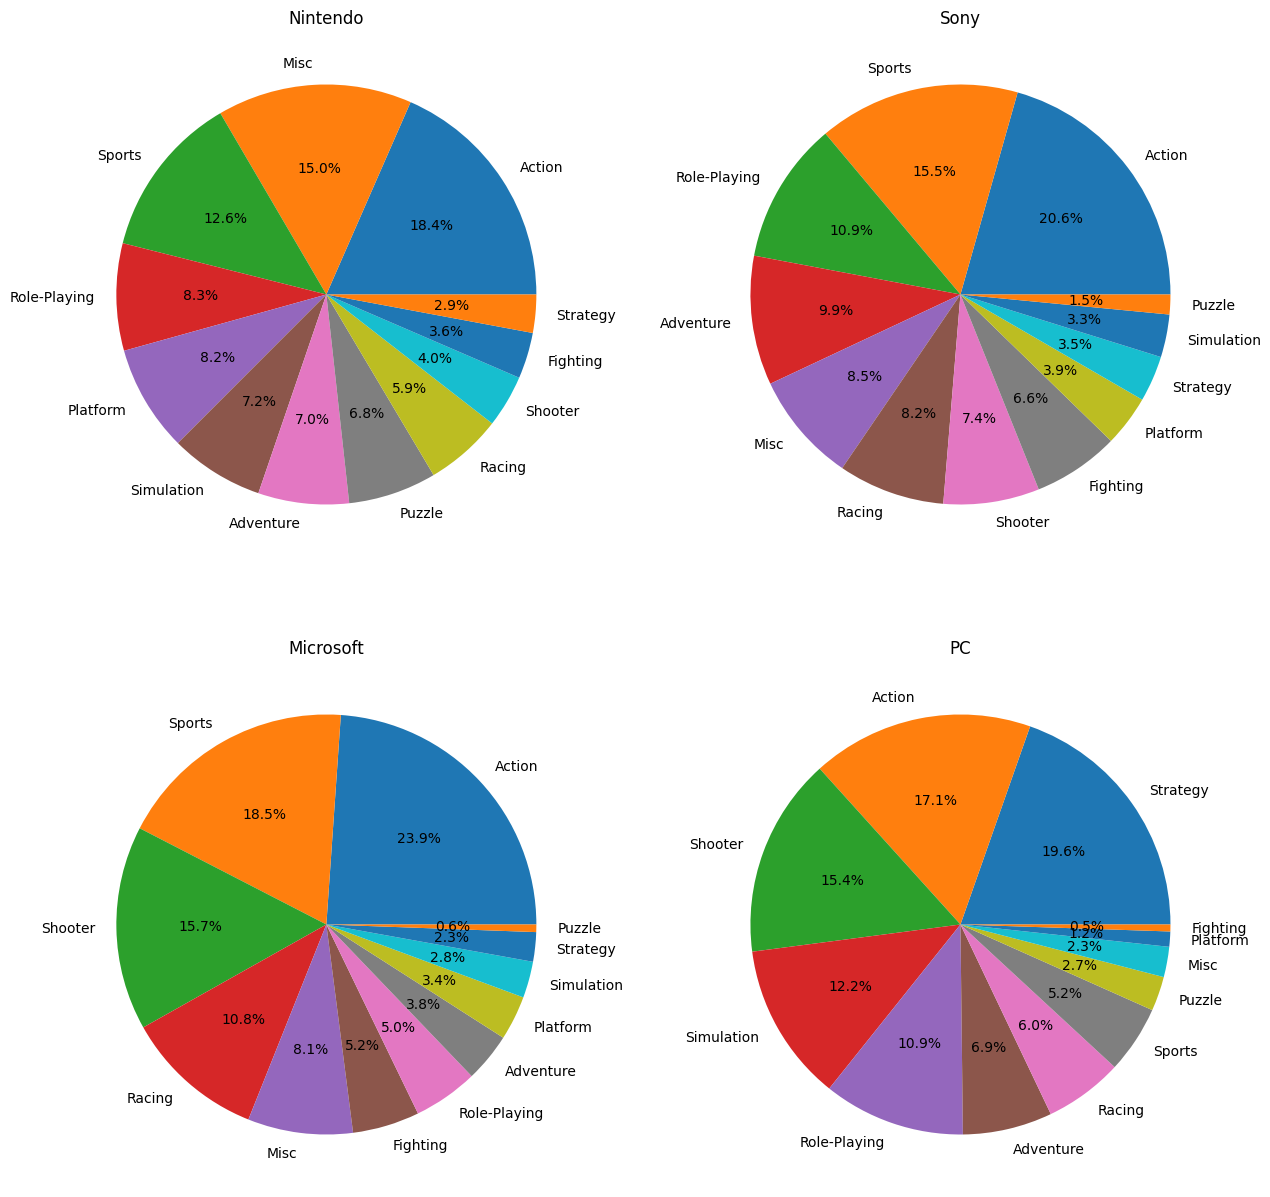

In [18]:
# Generate a table for each company with global sales of each genre (based on df_companies_genres_vgsales)
df_nintendo_sales = vgsales[vgsales['Platform'].isin(df_platforms_genres_vgsales[df_platforms_genres_vgsales['Company'] == 'Nintendo'].index)]['Genre'].value_counts()
df_sony_sales = vgsales[vgsales['Platform'].isin(df_platforms_genres_vgsales[df_platforms_genres_vgsales['Company'] == 'Sony'].index)]['Genre'].value_counts()
df_microsoft_sales = vgsales[vgsales['Platform'].isin(df_platforms_genres_vgsales[df_platforms_genres_vgsales['Company'] == 'Microsoft'].index)]['Genre'].value_counts()
df_pc_sales = vgsales[vgsales['Platform'].isin(df_platforms_genres_vgsales[df_platforms_genres_vgsales['Company'] == 'PC'].index)]['Genre'].value_counts()

# Generate a plot with 4 pie charts, one for each company
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].pie(df_nintendo_sales, labels=df_nintendo_sales.index, autopct='%1.1f%%')
axs[0, 0].set_title('Nintendo')
axs[0, 1].pie(df_sony_sales, labels=df_sony_sales.index, autopct='%1.1f%%')
axs[0, 1].set_title('Sony')
axs[1, 0].pie(df_microsoft_sales, labels=df_microsoft_sales.index, autopct='%1.1f%%')
axs[1, 0].set_title('Microsoft')
axs[1, 1].pie(df_pc_sales, labels=df_pc_sales.index, autopct='%1.1f%%')
axs[1, 1].set_title('PC')
plt.show()

Analyzing this pie chart reveals some genres have a stronger association with specific platforms:

**Platformer** games are notably prominent on **Nintendo** (7.2%), while virtually absent or minimally represented on other platforms.

**Fighting** games command a significant share on **Nintendo** (5.9%) and **PC** (3.5%), yet are missing or negligible on Sony and Microsoft.

**Puzzle** games are fairly well-represented on **Sony** (3.3%) and **PC** (6.0%), but have a minimal presence or are absent on Nintendo and Microsoft.

**Racing** games have a considerable presence on **Microsoft** (10.8%), while being less prominent or absent on other platforms.

While major genres like Action, Sports, and Shooters are present across platforms to varying degrees, Platformers, Fighting, Puzzle, and Racing appear to be more platform-specific, aligning with the strengths and target audiences of their respective platforms.

### Can we identify trends or patterns in the rise and fall of different genres?

Let's regnerate "Count of Games in each Genre released in each Decade" which we saw before, but see it through years

In [19]:
# Create a new dataframe games released in each genre in each year (use df_rawg)
df_years_genres = pd.DataFrame(index=genres, columns=range(2000, 2021))

# Fill the dataframe with count of games in that genre released in that year
for genre in genres:
    for year in df_years_genres.columns:
        df_years_genres.loc[genre, year] = df_rawg[(df_rawg['genres'].str.contains(genre)) & (df_rawg['released'].dt.year == year)].shape[0]
        
df_years_genres


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Adventure,107,91,103,100,126,130,128,164,208,329,...,603,790,1051,2190,3774,5975,8313,11385,12770,17735
Puzzle,35,54,28,36,62,41,52,79,158,339,...,698,908,1098,2120,3073,4923,6298,8468,9824,14409
Simulation,74,68,53,79,82,72,79,76,109,228,...,394,557,712,1470,2781,4764,6177,6505,5640,7226
Indie,7,13,9,17,16,10,25,24,66,99,...,160,279,385,1002,2114,3593,4832,6051,4115,4023
Arcade,237,262,198,252,265,237,285,255,318,610,...,941,1193,1114,2175,2144,2461,2476,2481,566,61
Action,152,194,187,222,229,269,274,293,382,654,...,1146,1361,1603,3692,5753,9032,12514,16018,15902,22681
RPG,65,72,85,109,105,103,114,121,146,230,...,409,535,754,1283,2044,2895,3690,4736,4824,5730
Strategy,118,173,139,201,189,169,196,213,229,391,...,575,779,783,1364,2107,3081,3739,4496,4292,5852
Massively Multiplayer,3,7,10,30,33,34,32,38,45,71,...,75,80,59,57,114,176,200,217,161,175
Shooter,53,71,68,90,78,100,86,106,105,130,...,151,147,206,817,1455,2568,4118,4734,5755,9578


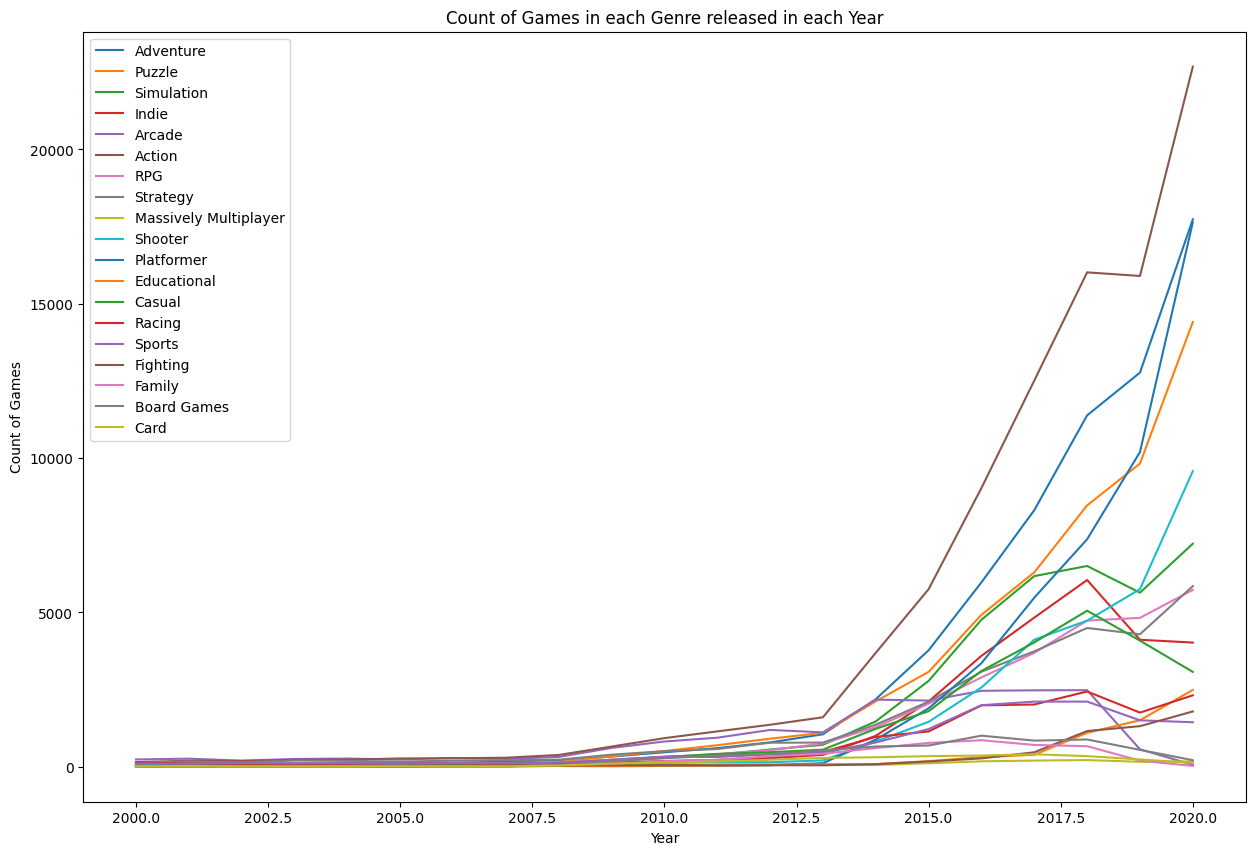

In [20]:
# Create a graph to show the count of games in each genre released in each year
plt.figure(figsize=(15, 10))
for genre in genres:
    plt.plot(df_years_genres.columns, df_years_genres.loc[genre], label=genre)
plt.xlabel('Year')
plt.ylabel('Count of Games')
plt.title('Count of Games in each Genre released in each Year')
plt.legend(loc='upper left')
plt.show()

Let's look more closely. We can check trends in 2010s and 2020s which we can see a peak in video game industry.

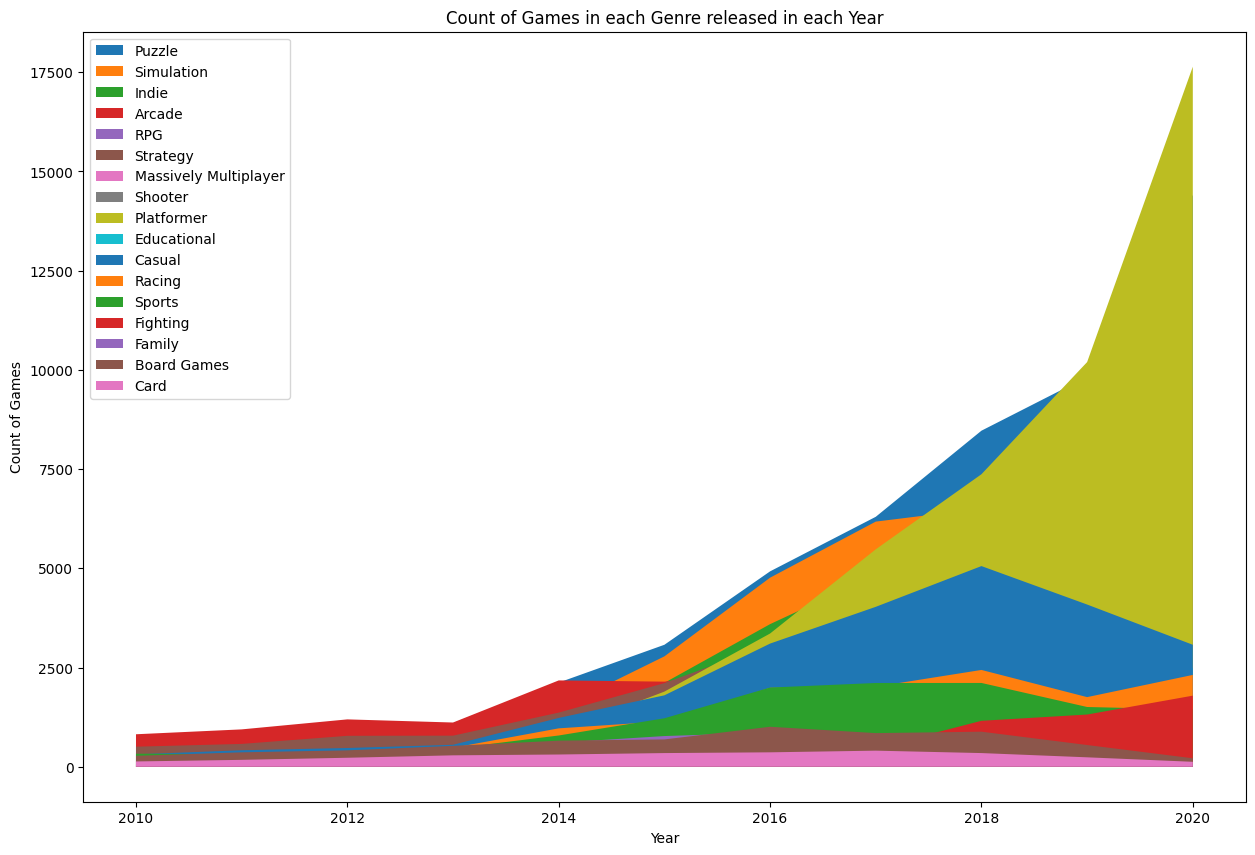

In [21]:
# Drop results of top 3 categories
df_years_genres_normalized = df_years_genres.drop(['Action', 'Adventure'])

# Drop games befor 2010
df_years_genres_normalized = df_years_genres_normalized.drop(columns=range(2000, 2010))

# Create a geom density filled plot to show the count of games in each genre released in each year
df_years_genres_normalized = df_years_genres_normalized.apply(pd.to_numeric)
plt.figure(figsize=(15, 10))
for genre in df_years_genres_normalized.index:
    plt.fill_between(df_years_genres_normalized.columns, df_years_genres_normalized.loc[genre], label=genre)
plt.xlabel('Year')
plt.ylabel('Count of Games')
plt.title('Count of Games in each Genre released in each Year')
plt.legend(loc='upper left')
plt.show()


Amazing, We can see an increase in number of platformer games after 2016. let's ask Gemini AI why this increase happened.

> The increase in platformer games in the later years of the graph (2016-2020) can likely be attributed to a few factors:
> 1. **Resurgence of Retro Trends**: The popularity of retro-style games, often with pixel art and classic mechanics, saw a resurgence during this period. This nostalgia trend particularly benefited the platformer genre, as many classic platformers from the 80s and 90s became influential inspirations for new indie developers.
> 2. **Indie Game Boom**: The rise of digital distribution platforms like Steam and the accessibility of game development tools democratized game creation, leading to a boom in indie games. Many independent developers chose the platformer genre due to its relative simplicity compared to other genres, making it a more accessible entry point for new creators.
> 3. **Technological Advancements**: New game engines and tools made it easier for developers to create visually appealing and mechanically complex platformer games. This allowed for more innovation within the genre, attracting both veteran and new players.
> 4. **Success of Key Titles**: The success of certain platformer games during this period, such as "Celeste" (2018), "Hollow Knight" (2017), and "Ori and the Blind Forest" (2015), helped revitalize interest in the genre and demonstrated its potential for critical and commercial success.
> Broad Appeal: Platformer games often feature simple yet engaging gameplay mechanics that appeal to a wide audience, including both casual and hardcore gamers. This accessibility helped platformers gain traction and popularity among diverse player groups.

I should mention again that RAWG database is an open-access database. It means that everyone can list a game inside this website. Even if you developed a clone of *Super-Mario* you can list it in this database which make an impact on number or platformer games.

Also here we can visualize growth rate of each genre after 2000.

In [38]:
# calculate growth rate of each genre in each year (use df_rawg)
df_years_genres_growth = pd.DataFrame(index=genres, columns=range(2000, 2021))

# Fill the dataframe with growth rate of games in that genre released in that year
for genre in genres:
    for year in df_years_genres_growth.columns:
        df_years_genres_growth.loc[genre, year] = df_rawg[(df_rawg['genres'].str.contains(genre)) & (df_rawg['released'].dt.year == year)].shape[0]
        
df_years_genres_growth = df_years_genres_growth.pct_change(axis=1) * 100

# replace nan with 0
df_years_genres_growth = df_years_genres_growth.fillna(0)
df_years_genres_growth

C:\Users\javad\AppData\Local\Temp\ipykernel_17692\537168703.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Adventure,0.0,-14.953271,13.186813,-2.912621,26.000000,3.174603,-1.538462,28.125000,26.829268,58.173077,...,28.297872,31.011609,33.037975,108.372978,72.328767,58.320085,39.129707,36.954168,12.165130,38.880188
Puzzle,0.0,54.285714,-48.148148,28.571429,72.222222,-33.870968,26.829268,51.923077,100.000000,114.556962,...,37.131631,30.085960,20.925110,93.078324,44.952830,60.201757,27.930124,34.455383,16.013226,46.671417
Simulation,0.0,-8.108108,-22.058824,49.056604,3.797468,-12.195122,9.722222,-3.797468,43.421053,109.174312,...,23.899371,41.370558,27.827648,106.460674,89.183673,71.305286,29.659950,5.310021,-13.297463,28.120567
Indie,0.0,85.714286,-30.769231,88.888889,-5.882353,-37.500000,150.000000,-4.000000,175.000000,50.000000,...,25.000000,74.375000,37.992832,160.259740,110.978044,69.962157,34.483718,25.227649,-31.994712,-2.235723
Arcade,0.0,10.548523,-24.427481,27.272727,5.158730,-10.566038,20.253165,-10.526316,24.705882,91.823899,...,15.036675,26.780021,-6.621961,95.242370,-1.425287,14.785448,0.609508,0.201939,-77.186618,-89.222615
Action,0.0,27.631579,-3.608247,18.716578,3.153153,17.467249,1.858736,6.934307,30.375427,71.204188,...,23.624595,18.760908,17.781043,130.318153,55.823402,56.996350,38.551816,28.000639,-0.724185,42.629858
RPG,0.0,10.769231,18.055556,28.235294,-3.669725,-1.904762,10.679612,6.140351,20.661157,57.534247,...,29.430380,30.806846,40.934579,70.159151,59.314108,41.634051,27.461140,28.346883,1.858108,18.781095
Strategy,0.0,46.610169,-19.653179,44.604317,-5.970149,-10.582011,15.976331,8.673469,7.511737,70.742358,...,13.861386,35.478261,0.513479,74.201788,54.472141,46.226863,21.356702,20.246055,-4.537367,36.346692
Massively Multiplayer,0.0,133.333333,42.857143,200.000000,10.000000,3.030303,-5.882353,18.750000,18.421053,57.777778,...,15.384615,6.666667,-26.250000,-3.389831,100.000000,54.385965,13.636364,8.500000,-25.806452,8.695652
Shooter,0.0,33.962264,-4.225352,32.352941,-13.333333,28.205128,-14.000000,23.255814,-0.943396,23.809524,...,-3.205128,-2.649007,40.136054,296.601942,78.090575,76.494845,60.358255,14.958718,21.567385,66.429192


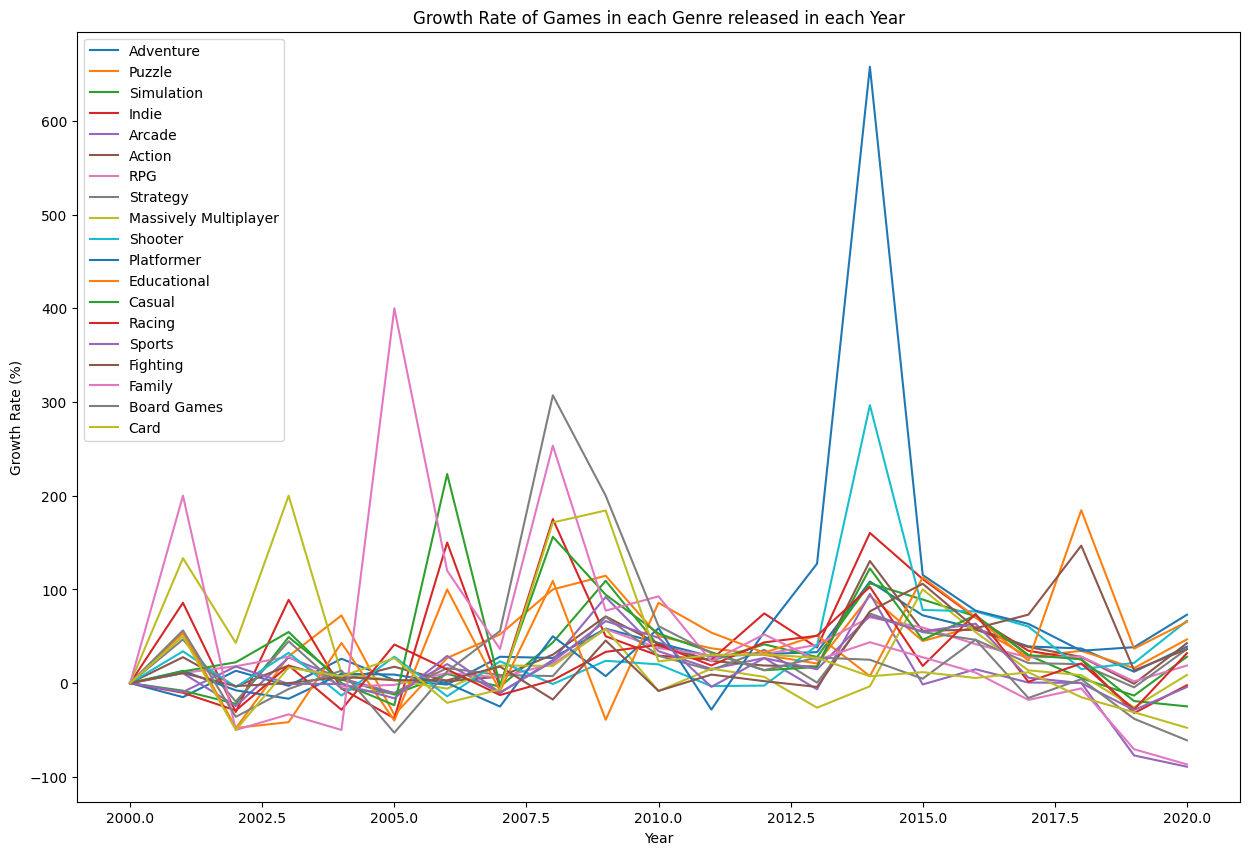

In [39]:
# visualize the growth rate of each genre in each year
plt.figure(figsize=(15, 10))
for genre in genres:
    plt.plot(df_years_genres_growth.columns, df_years_genres_growth.loc[genre], label=genre)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate of Games in each Genre released in each Year')
plt.legend(loc='upper left')
plt.show()

This graph is amazing! Why? let's se it again. we can see a high rise in growth of **adventure** games on 2013. Can you guess why?
let's check [*wikipedia*](https://en.wikipedia.org/wiki/Eighth_generation_of_video_game_consoles). According to this article, Sony Microsoft released their 8th generation consoles on February 20, 2013 and May 21, 2013. As we understood in previous question, Adventure games are popular between console gamers. later we will see a list of adventure games that are exclusive to Sony and Microsoft consoles.

But what about users demand? how preferences of gamers have been changed through time? let's check what type of games have been sold globally.

In [22]:
vgsales = pd.read_csv('vgsales.csv')

# Drop rows with missing values in Year column
vgsales = vgsales.dropna(subset=['Year'])

vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


e:\Workspace\GameTime\.venv\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 4 rows containing non-finite values.


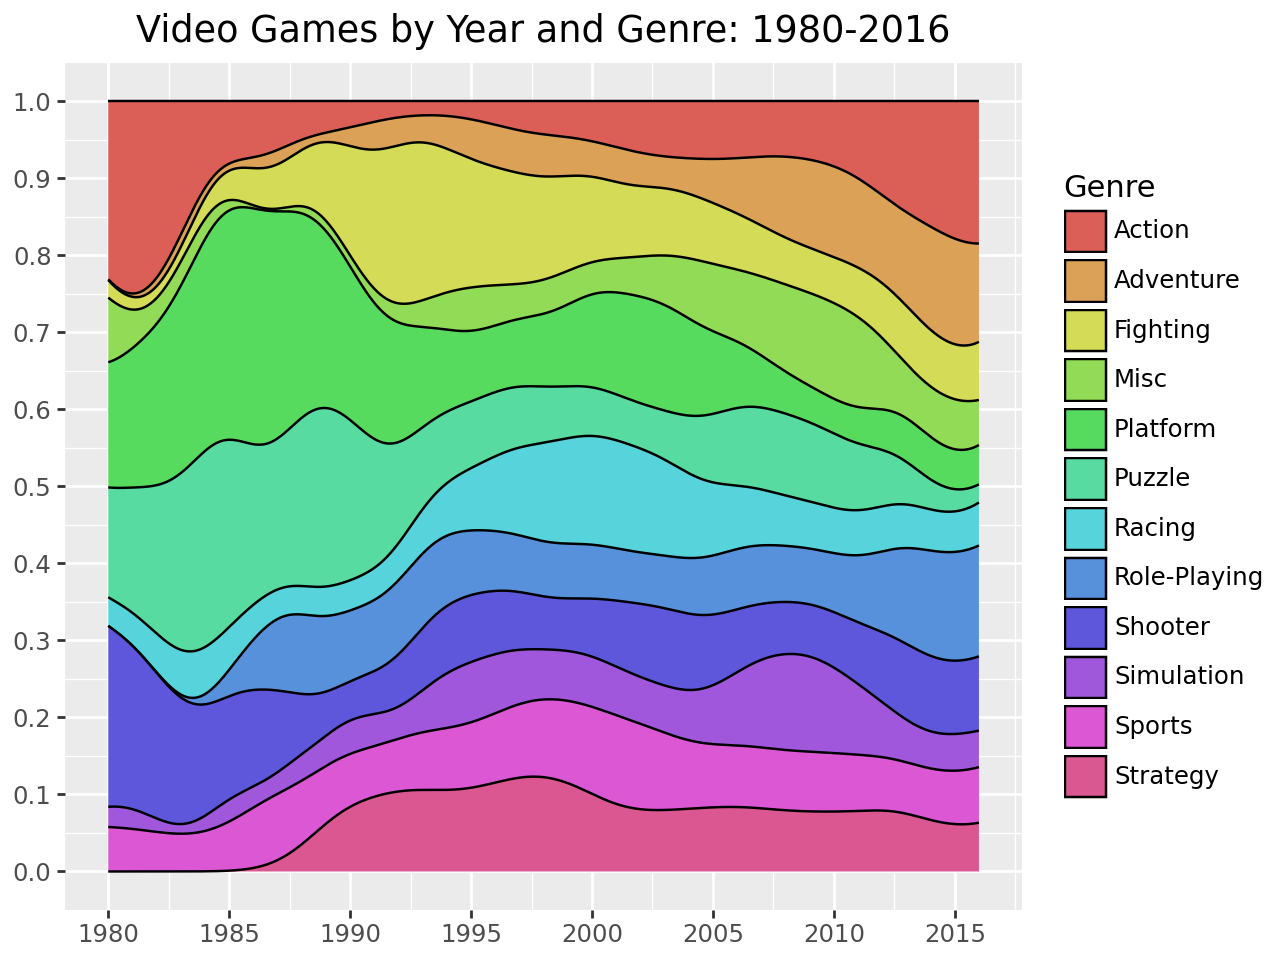

In [26]:
from plotnine import *



plot = (ggplot(vgsales, aes(x='Year', group='Genre', fill='Genre')) +
        geom_density(adjust=1.5, position="fill") +
        scale_x_continuous(limits=(1980, 2016), breaks=range(1980, 2017, 5)) +
        scale_y_continuous(limits=(0, 1), breaks=[i/10 for i in range(11)]) +
        labs(x="", y="") +
        ggtitle("Video Games by Year and Genre: 1980-2016"))


plot

The graph shows how the popularity of video game genres has changed from 1980 to 2016.  Action games have consistently remained popular, while genres like Sports and Shooter have grown since the late 1990s. The Platform genre, popular in the 80s and 90s, has declined, while Role-playing games have fluctuated. Overall, the video game market has become more diverse, with no single genre dominating by 2016.

But is mentioned before, this dataset has two major problem:
1. It's not up-to-date, this data contains list of popular games until 2016 but in previous years popularity of video game hase increased, specialy after Covid-19.
2. This dataset doesn't include lots of games.

so, let's do it with another data. Before, we analyzed the RAWG dataset, but unfortunately this one had also some problems. So, we can scrap it to take the data useful for current question.
RAWG database provides a powerful API, but we didn't used it to answer previous questions. This API has a request limit per user, and also it has a rate limit which blocked us after about 60 requests for a while. But we managed to create a dataset of games ordered by **metacritic** rates which gives us a list of most popular games rated by users and Vide Game journalists (e.g. IGN, GameSpot, etc.)

In [27]:
df_rawg_metacritic = pd.read_csv('rawg_by_metacritic.csv')

# Convert released column to datetime
df_rawg_metacritic['released'] = pd.to_datetime(df_rawg_metacritic['released'])

# drop rows with nan
df_rawg_metacritic = df_rawg_metacritic.dropna(subset=['genre'])

df_rawg_metacritic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2876 entries, 0 to 2879
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        2876 non-null   int64         
 1   name      2876 non-null   object        
 2   released  2874 non-null   datetime64[ns]
 3   score     2876 non-null   int64         
 4   genre     2876 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 134.8+ KB


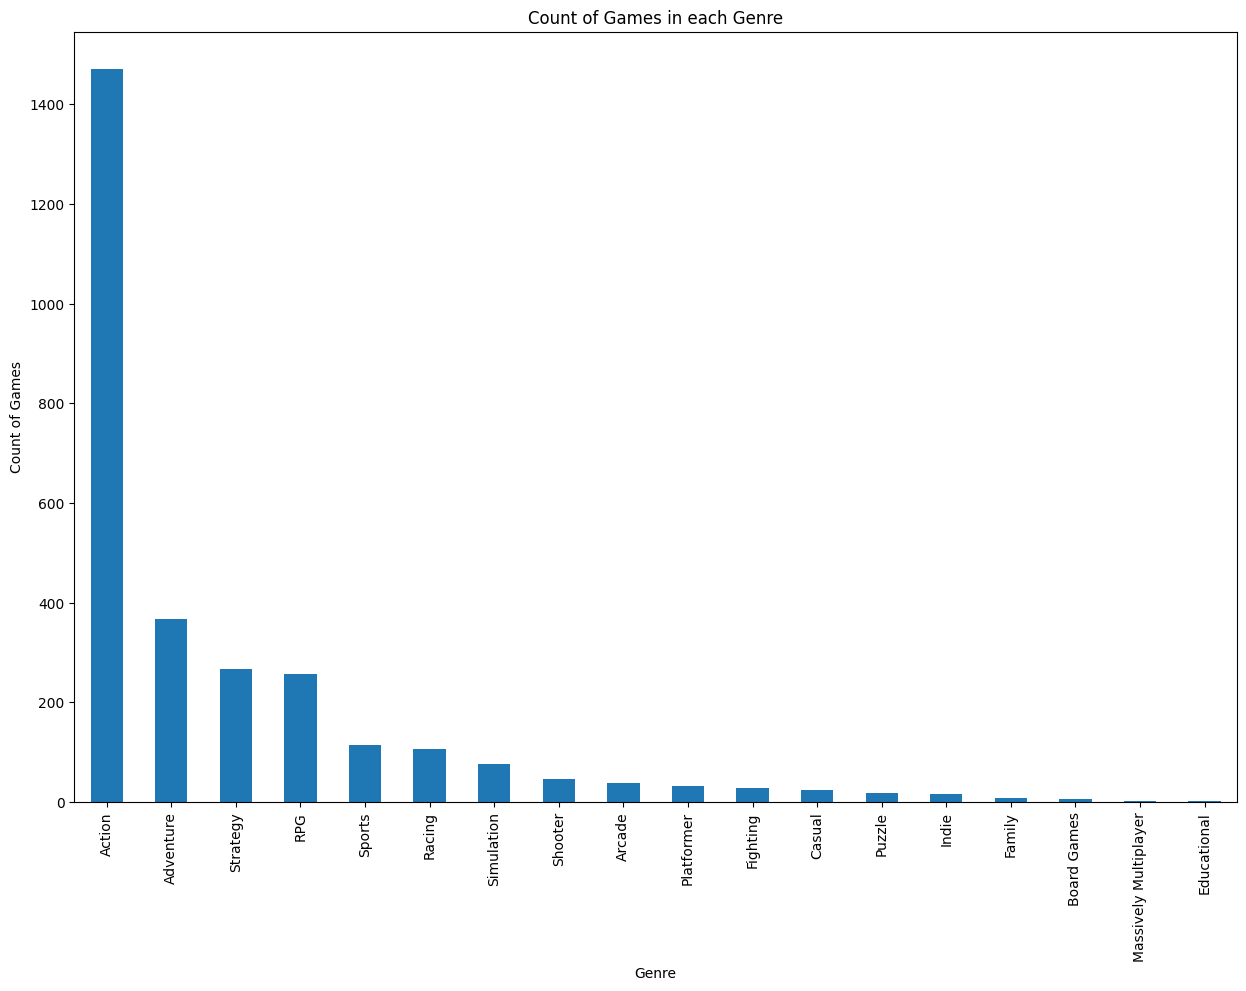

In [28]:
# Create a plot of count of games in ecah genre (from df_rawg_metacritic)
plt.figure(figsize=(15, 10))
df_rawg_metacritic['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count of Games')
plt.title('Count of Games in each Genre')
plt.show()

e:\Workspace\GameTime\.venv\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 2 rows containing non-finite values.
e:\Workspace\GameTime\.venv\Lib\site-packages\plotnine\stats\stat_density.py:176: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
e:\Workspace\GameTime\.venv\Lib\site-packages\plotnine\stats\stat_density.py:181: PlotnineWarning: Groups with fewer than 2 data points have been removed.


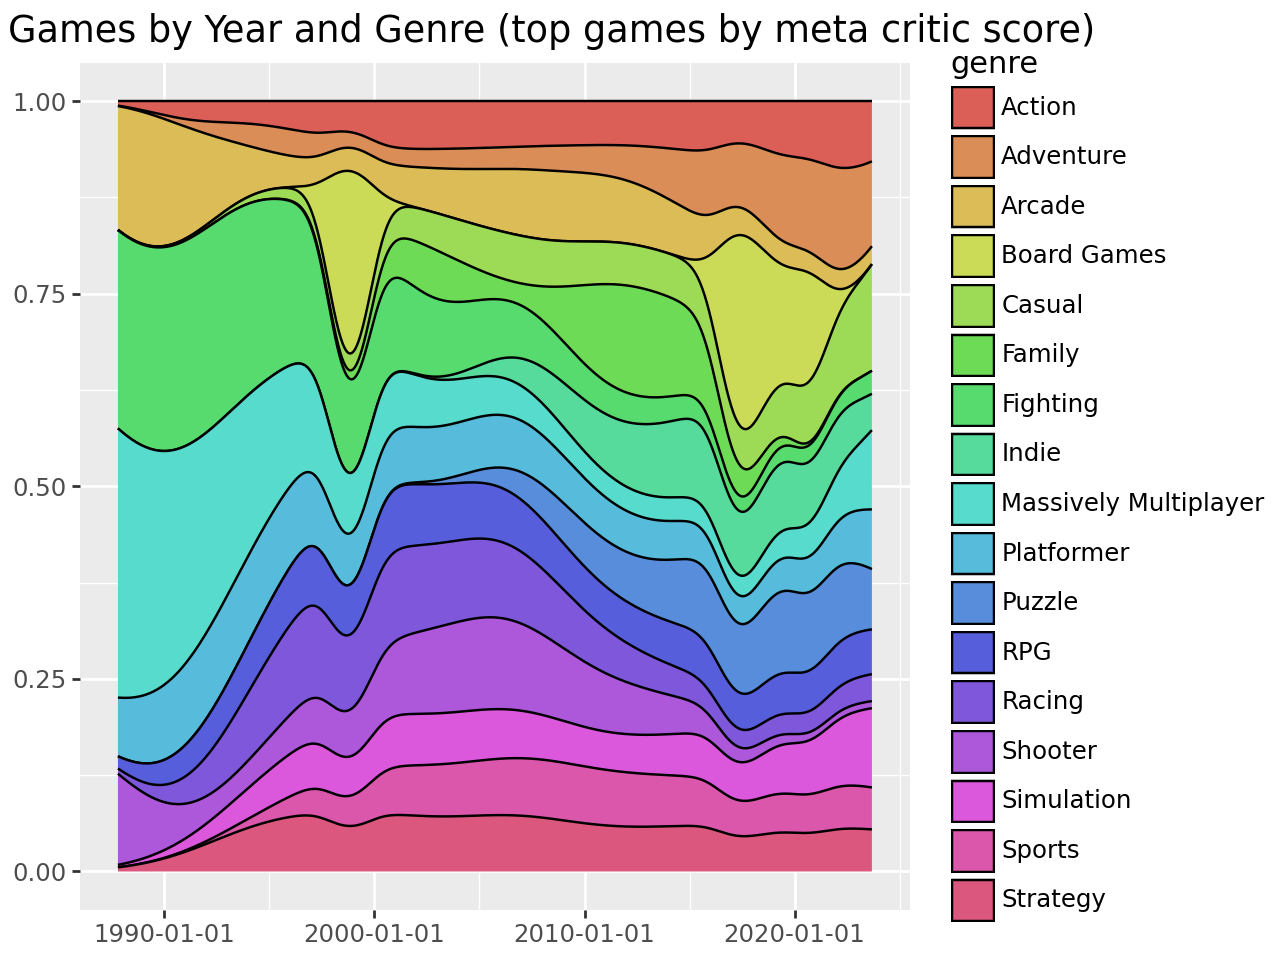

In [29]:
from plotnine import *



plot = (ggplot(df_rawg_metacritic, aes(x='released', group='genre', fill='genre')) +
        geom_density(adjust=1.5, position="fill") +
        labs(x="", y="") +
        ggtitle("Video Games by Year and Genre (top games by meta critic score)"))


plot

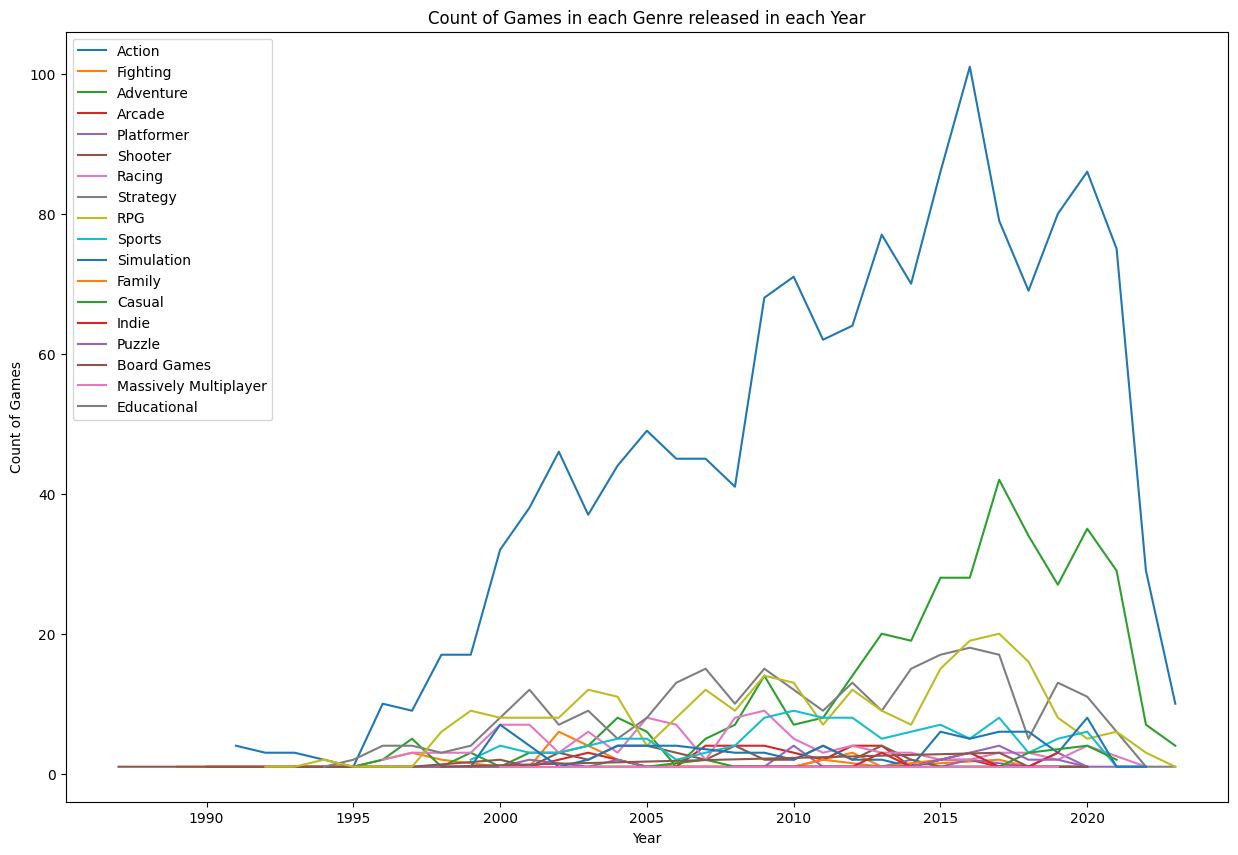

In [30]:
# Create a graph to show the count of games in each genre released in each year
plt.figure(figsize=(15, 10))
for genre in df_rawg_metacritic['genre'].unique():
    df_rawg_metacritic[df_rawg_metacritic['genre'] == genre]['released'].dt.year.value_counts().sort_index().plot(label=genre)
plt.xlabel('Year')
plt.ylabel('Count of Games')
plt.title('Count of Games in each Genre released in each Year')
plt.legend(loc='upper left')
plt.show()

These graphs tell a story about how video games evolved from the 90s to 2020. We see a boom and bust in the sheer number of games made, with action always being king, but other genres like casual and indie getting their time to shine.

But it's not just about quantity, it's about quality too. The second graph shows us that even as fewer games were made overall, the variety of critically acclaimed titles actually grew. This suggests that while we may not be getting as many new games, the ones we do get are pushing boundaries and exploring new genres. It's a fascinating look at how the gaming world has changed, and it's exciting to think about where it's headed next.